<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_10_5_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 10: Time Series in PyTorch**    

* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 10 Material

* Part 10.1: Time Series Data Encoding for Deep Learning, PyTorch [[Video]](https://www.youtube.com/watch?v=CZi5Avp6p1s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_10_1_timeseries.ipynb)
* Part 10.2: LSTM-Based Time Series with PyTorch [[Video]](https://www.youtube.com/watch?v=hIQLy5zCgH4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_10_2_lstm.ipynb)
* Part 10.3: Transformer-Based Time Series with PyTorch [[Video]](https://www.youtube.com/watch?v=NGzQpphf_Vc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_10_3_transformer_timeseries.ipynb)
* Part 10.4: Seasonality and Trend [[Video]](https://www.youtube.com/watch?v=HOkxoLaUF9s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_10_4_seasonal.ipynb)
* **Part 10.5: Predicting with Meta Prophet** [[Video]](https://www.youtube.com/watch?v=MzjMVsz0GyA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_10_5_prophet.ipynb)

# Google CoLab Instructions

The following code checks that Google CoLab is and sets up the correct hardware settings for PyTorch.


In [1]:
try:
    import google.colab
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Make use of a GPU or MPS (Apple) if one is available.  (see module 3.2)
import torch

device = (
    "mps"
    if getattr(torch, "has_mps", False)
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Note: using Google CoLab
Using device: cuda


This notebook makes use of Meta (aka Facebook) Prophet AutoML to forecast time series.

In [2]:
import pandas as pd
import os

df_sales = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/sales_train.csv")
df_items = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/items.csv")
df_resturant = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/resturants.csv")

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce')

Begin by producing a line graph of all sales over the provided 3-year timespan. We will use this to train Prophet.

In [3]:
import plotly.express as px

df_plot = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
fig.show()

Construct prophet and put the previous data into the form expected by prophet.

In [4]:
import pandas as pd
from prophet import Prophet

df_plot.columns = ['ds','y']

m = Prophet()
m.fit(df_plot)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmipx37c/uugsw1ls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmipx37c/5e74fowv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75161', 'data', 'file=/tmp/tmplmipx37c/uugsw1ls.json', 'init=/tmp/tmplmipx37c/5e74fowv.json', 'output', 'file=/tmp/tmplmipx37c/prophet_modelbev2j341/prophet_model-20230924142839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predict one year into the future.

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1091,2022-12-27
1092,2022-12-28
1093,2022-12-29
1094,2022-12-30
1095,2022-12-31


Display the predicted tabular data.

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1091,2022-12-27,339.497078,285.411225,394.355400
1092,2022-12-28,401.343828,346.652231,453.377907
1093,2022-12-29,576.524380,524.663373,626.842143
1094,2022-12-30,701.251481,644.508124,753.933532
1095,2022-12-31,698.556207,643.678378,752.427193


Plot the future predictions.

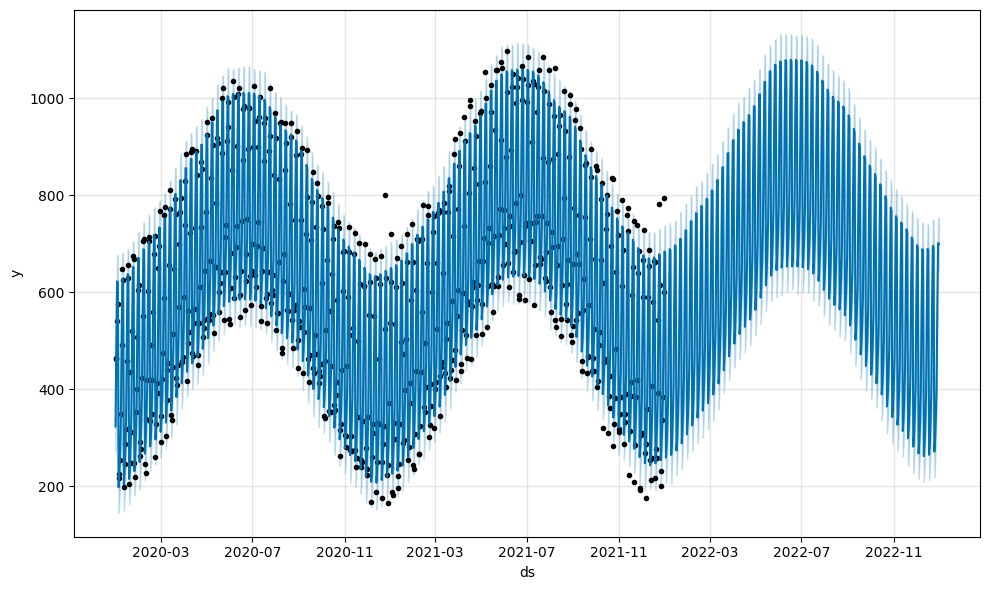

In [7]:
fig1 = m.plot(forecast)

See what seasonality and trend were detected.

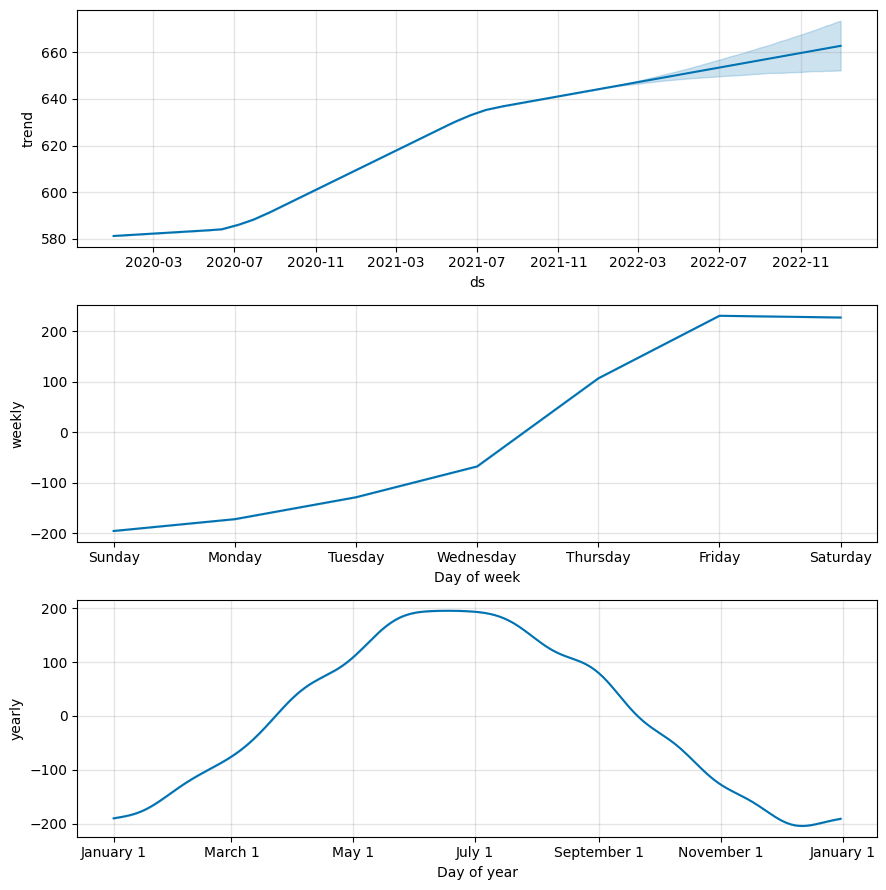

In [8]:
fig2 = m.plot_components(forecast)

Use Plotly to generate an interactive plot.

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)